In [6]:
# Install the required package
%pip install python-dotenv
%pip install groq
%pip install langchain langgraph langsmith langchain_groq

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.6 MB 4.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/12.6 MB 4.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.6/12.6 MB 4.2 MB/s eta 0:00:03
   ---------- ----------------------------- 3.4/12.6 MB 4.0 MB/s eta 0:00:03
   ------------- -------------------------- 4.2/12.6 MB 4.1 MB/s eta 0:00:03
   ---------------- ----------------------- 5.2/12.6 MB 4.0 MB/s eta 0:00:02
   ------------------- -------------------- 6.0/12.6 MB 4.0 MB/s eta 0:00:02
   --------------------- ------------------ 6.8/12.6 MB 4.0 MB/s eta 0:00:02
   ------------------------ ---------

## Define state
LangGraph is a statemachine infrastructure with nodes and edges. State is a object that will be shared across these nodes and edges. The state object can be used for routing to a specific nodes based on conditions.

A state will hold all the messages that are added or updated by nodes in a path. Nodes can also remove them. This object also holds the next node to invoke. Following is a simple state definition.

In [1]:
from typing import Dict, TypedDict,List
from langchain.schema import BaseMessage

# Define our state structure
class State(TypedDict):
    messages: List[BaseMessage]
    next_step: str

## StateGraph
StateGraph is the core component that orchestrate the workflow. A StateGraph should know four things, 
1. Nodes
2. Edges
3. End Node
4. Starting point

### Node
Node is just a function that takes State object, do something and return the updated state object.

### Edge
Edge is defined by two things, preceeding node and following node.

### End Node
End node has a specific name in LnagGraph, END. 

### Starting point
Every stategraph should have a starting point to bigin the execution. We can point one node as starting point with the StateGraph method "set_starting_point()".

In [9]:
from langgraph.graph import StateGraph, END

# StateGraph
workflow = StateGraph(State)

# Our first node
def firstNode(state: State) -> State:
    state["messages"].append({"content": "Our first langgraph node", "role":"assistant"})
    state["next_step"] = "end" # end is framework's node to designate the end node
    
    return state

# Lets add our first node to workflow
workflow.add_node("say_hi", firstNode)

# Lets wireup the node with start and end nodes
workflow.add_edge("say_hi", END)    # Connecting the END Node
workflow.set_entry_point("say_hi")  # Pointing the _START_ node

# All done, lets compile the workflow to make an app
app = workflow.compile()

Now the workflow is compiled and ready for execution. We can visualize the workflow that we created to identify any mistages.

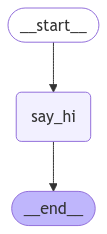

In [6]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

## Run the app/workflow

In [10]:
init_state = {"next_step":"", "messages":[]}

for event in app.stream(init_state):
    for output in event.values():
        if "messages" in output:
            for message in output["messages"]:
                if message["role"] == "assistant":
                    print(f"Assistant: {message['content']}")
                elif message["role"] == "human":
                    print(f"Human: {message['content']}")
                    
print("End of workflow")

Assistant: Our first langgraph node
End of workflow
